In [1]:
import pandas as pd
# load data from csv file
df = pd.read_csv("D:/Python/dataset/train.csv")

In [3]:
# preview the data (head)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# preview the data (tail)
df.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Show出各個項目的資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [9]:
# 對所有屬於數值型態(Numerical)的 column 作統計結果的 summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 對所有屬於字串型態(String)的 column 作統計結果的 summary
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cacic, Miss. Marija",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [19]:
# 擷取 survived, sex 兩個項目的資料
subdf=df[['survived', 'sex']]
subdf.head()

,survived,sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [70]:
# 將 dataframe (df) 轉為 array (一維陣列)
sur_array=subdf[['survived']].values
print(sur_array[4])

[0]


In [65]:
# 將 dataframe (df) 轉為 array (多維陣列)
subdf.values

array([[0, 'male'],
       [1, 'female'],
       [1, 'female'],
       ..., 
       [0, 'female'],
       [1, 'male'],
       [0, 'male']], dtype=object)

In [27]:
# 以 sex 分組別，算出 based on sex 的 survived 項目的平均值
subdf.groupby(['sex'], as_index=False).mean()

,sex,survived
0,female,0.742038
1,male,0.188908


In [32]:
# 以 sex 分組別，算出 based on sex 的 survived 項目的平均值，接著按照遞增的順序排序
subdf.groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=True)

,sex,survived
1,male,0.188908
0,female,0.742038


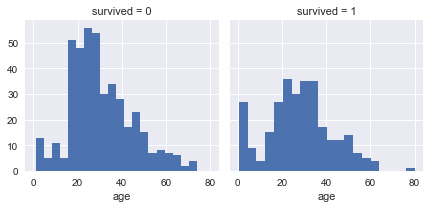

In [55]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
# 針對 survived 的各種可能，繪出 age 的 histogram
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)
g.add_legend()

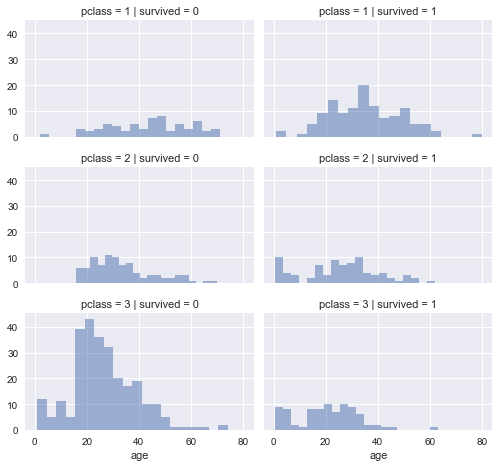

In [48]:
# The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
# 針對 (survived, pclass) 的各種可能，繪出 age 的 histogram
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

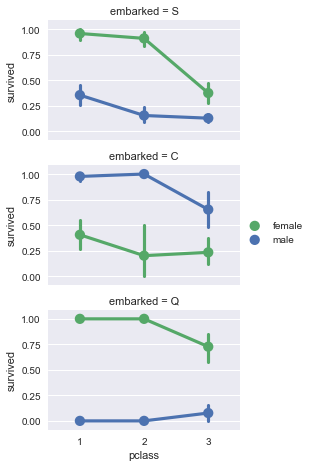

In [52]:
# The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
# 針對 embarked 的各種可能，繪出 以 pclass 為 x 軸，averaged survived 為 y 軸，對不同的 sex 劃出曲線圖
grid = sns.FacetGrid(df, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

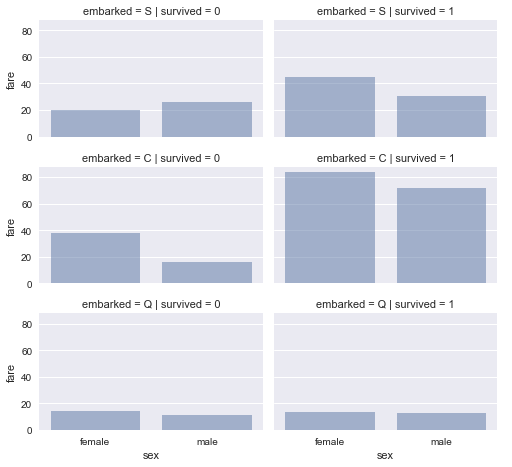

In [54]:
# The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
# 針對 (embarked, survived) 的各種可能，繪出 以 sex 為 x 軸，averaged fare 為 y 軸，劃出長條圖
grid = sns.FacetGrid(df, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()